[Exploratory_Data_Analysis](#Exploratory_Data_Analysis)

 * [1 Analyzing Data's Stats](#1_Analyzing_Datas_Stats)
   * [1a. Data Tables](#1a.Data_Tables)
   
   
 * [2 Data Relationships](#2_Data_Relationships)
   * [2.1_Heatmap](#2.1_Heatmap)
   
 * [3 Feature Selection And Engineering](#3_Feature_Selection_And_Engineering)


# Exploratory Data Analysis <a id='Exploratory_Data_Analysis'></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import multiprocessing

In [2]:
df_chunk = pd.read_csv('datasets/Clean_Raw_Data.csv', index_col=0, chunksize=100000)
df_list = []
for d in df_chunk:
    df_list.append(d)
df = pd.concat(df_list)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,Queens_PU_isna,Bronx_PU_isna,Brooklyn_PU_isna,Staten_Island_PU_isna,Manhattan_DO_isna,Queens_DO_isna,Bronx_DO_isna,Brooklyn_DO_isna,Staten_Island_DO_isna,Mins_In_Ride
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,N,6.0,3.0,0.5,1.47,0.0,...,0,0,0,0,0,0,0,0,0,4.80
1,2020-01-01 00:24:22,2020-01-01 00:25:54,1.0,0.56,N,3.5,0.5,0.5,1.70,0.0,...,0,0,0,0,0,0,0,0,0,1.53
2,2020-01-01 00:46:46,2020-01-01 00:49:17,1.0,0.62,N,4.5,0.5,0.5,1.00,0.0,...,0,0,0,0,0,0,0,0,0,2.52
3,2020-01-01 00:17:53,2020-01-01 00:22:47,1.0,0.80,Y,5.5,3.0,0.5,1.85,0.0,...,0,0,0,0,0,0,0,0,0,4.90
4,2020-01-01 00:49:45,2020-01-01 00:54:12,1.0,0.86,N,5.5,0.5,0.5,1.86,0.0,...,0,0,0,0,0,0,0,0,0,4.45


# 1. Analyzing Data's Stats <a id='1_Analyzing_Datas_Stats'></a>

# 1a. Data Tables <a id='1a.Data_Tables'></a>

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,16673218.0,1.467101e+00,1.143003,0.00,1.00,1.00,1.00,9.00
trip_distance,16673218.0,3.073729e+00,165.676680,-30.62,0.98,1.62,3.00,297004.51
fare_amount,16673218.0,1.253740e+01,195.443756,-1259.00,6.50,9.00,14.00,671100.14
extra,16673218.0,1.133242e+00,122.456794,-27.00,0.00,0.50,2.50,500000.80
mta_tax,16673218.0,5.230166e-01,122.450446,-0.50,0.50,0.50,0.50,500000.50
tip_amount,16673218.0,2.132019e+00,2.600147,-493.22,0.00,1.92,2.86,1100.00
tolls_amount,16673218.0,3.209923e-01,1.635388,-40.00,0.00,0.00,0.00,911.75
improvement_surcharge,16673218.0,2.979066e-01,0.034736,-0.30,0.30,0.30,0.30,0.30
total_amount,16673218.0,1.845377e+01,313.426462,-1260.30,11.16,14.30,19.80,1000003.80
congestion_surcharge,16673218.0,2.262234e+00,0.755269,-2.50,2.50,2.50,2.50,2.75


In [4]:
num_cols = df.columns
num_cols

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'store_and_fwd_flag', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'VendorID_1', 'VendorID_2',
       'RateCode_1', 'RateCode_2', 'RateCode_3', 'RateCode_4', 'RateCode_5',
       'RateCode_6', 'RateCode_99', 'payment_type_1', 'payment_type_2',
       'payment_type_3', 'payment_type_4', 'payment_type_5', 'Bronx_PU',
       'Brooklyn_PU', 'Manhattan_PU', 'Queens_PU', 'Staten_Island_PU',
       'Bronx_DO', 'Brooklyn_DO', 'Manhattan_DO', 'Queens_DO',
       'Staten_Island_DO', 'VendorID_isna', 'passenger_count_isna',
       'RatecodeID_isna', 'payment_type_isna', 'Manhattan_PU_isna',
       'Queens_PU_isna', 'Bronx_PU_isna', 'Brooklyn_PU_isna',
       'Staten_Island_PU_isna', 'Manhattan_DO_isna', 'Queens_DO_isna',
       'Bronx_DO_isna', 'Brooklyn_DO_isna', 'Staten_Island_DO_isna',
       'Mins_

# 2. Data Relationships <a id='2_Data_Relationships'></a>

# 2.1 Heatmap<a id='2.1_Heatmap'></a>

Need to create an AutoCorrelation

In [6]:
temp = df[df.columns[:37]].join(df['Mins_In_Ride'])
temp.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,Brooklyn_PU,Manhattan_PU,Queens_PU,Staten_Island_PU,Bronx_DO,Brooklyn_DO,Manhattan_DO,Queens_DO,Staten_Island_DO,Mins_In_Ride
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,N,6.0,3.0,0.5,1.47,0.0,...,0,1,0,0,0,0,1,0,0,4.80
1,2020-01-01 00:24:22,2020-01-01 00:25:54,1.0,0.56,N,3.5,0.5,0.5,1.70,0.0,...,0,1,0,0,0,0,1,0,0,1.53
2,2020-01-01 00:46:46,2020-01-01 00:49:17,1.0,0.62,N,4.5,0.5,0.5,1.00,0.0,...,0,1,0,0,0,0,1,0,0,2.52
3,2020-01-01 00:17:53,2020-01-01 00:22:47,1.0,0.80,Y,5.5,3.0,0.5,1.85,0.0,...,0,1,0,0,0,0,1,0,0,4.90
4,2020-01-01 00:49:45,2020-01-01 00:54:12,1.0,0.86,N,5.5,0.5,0.5,1.86,0.0,...,0,1,0,0,0,0,1,0,0,4.45


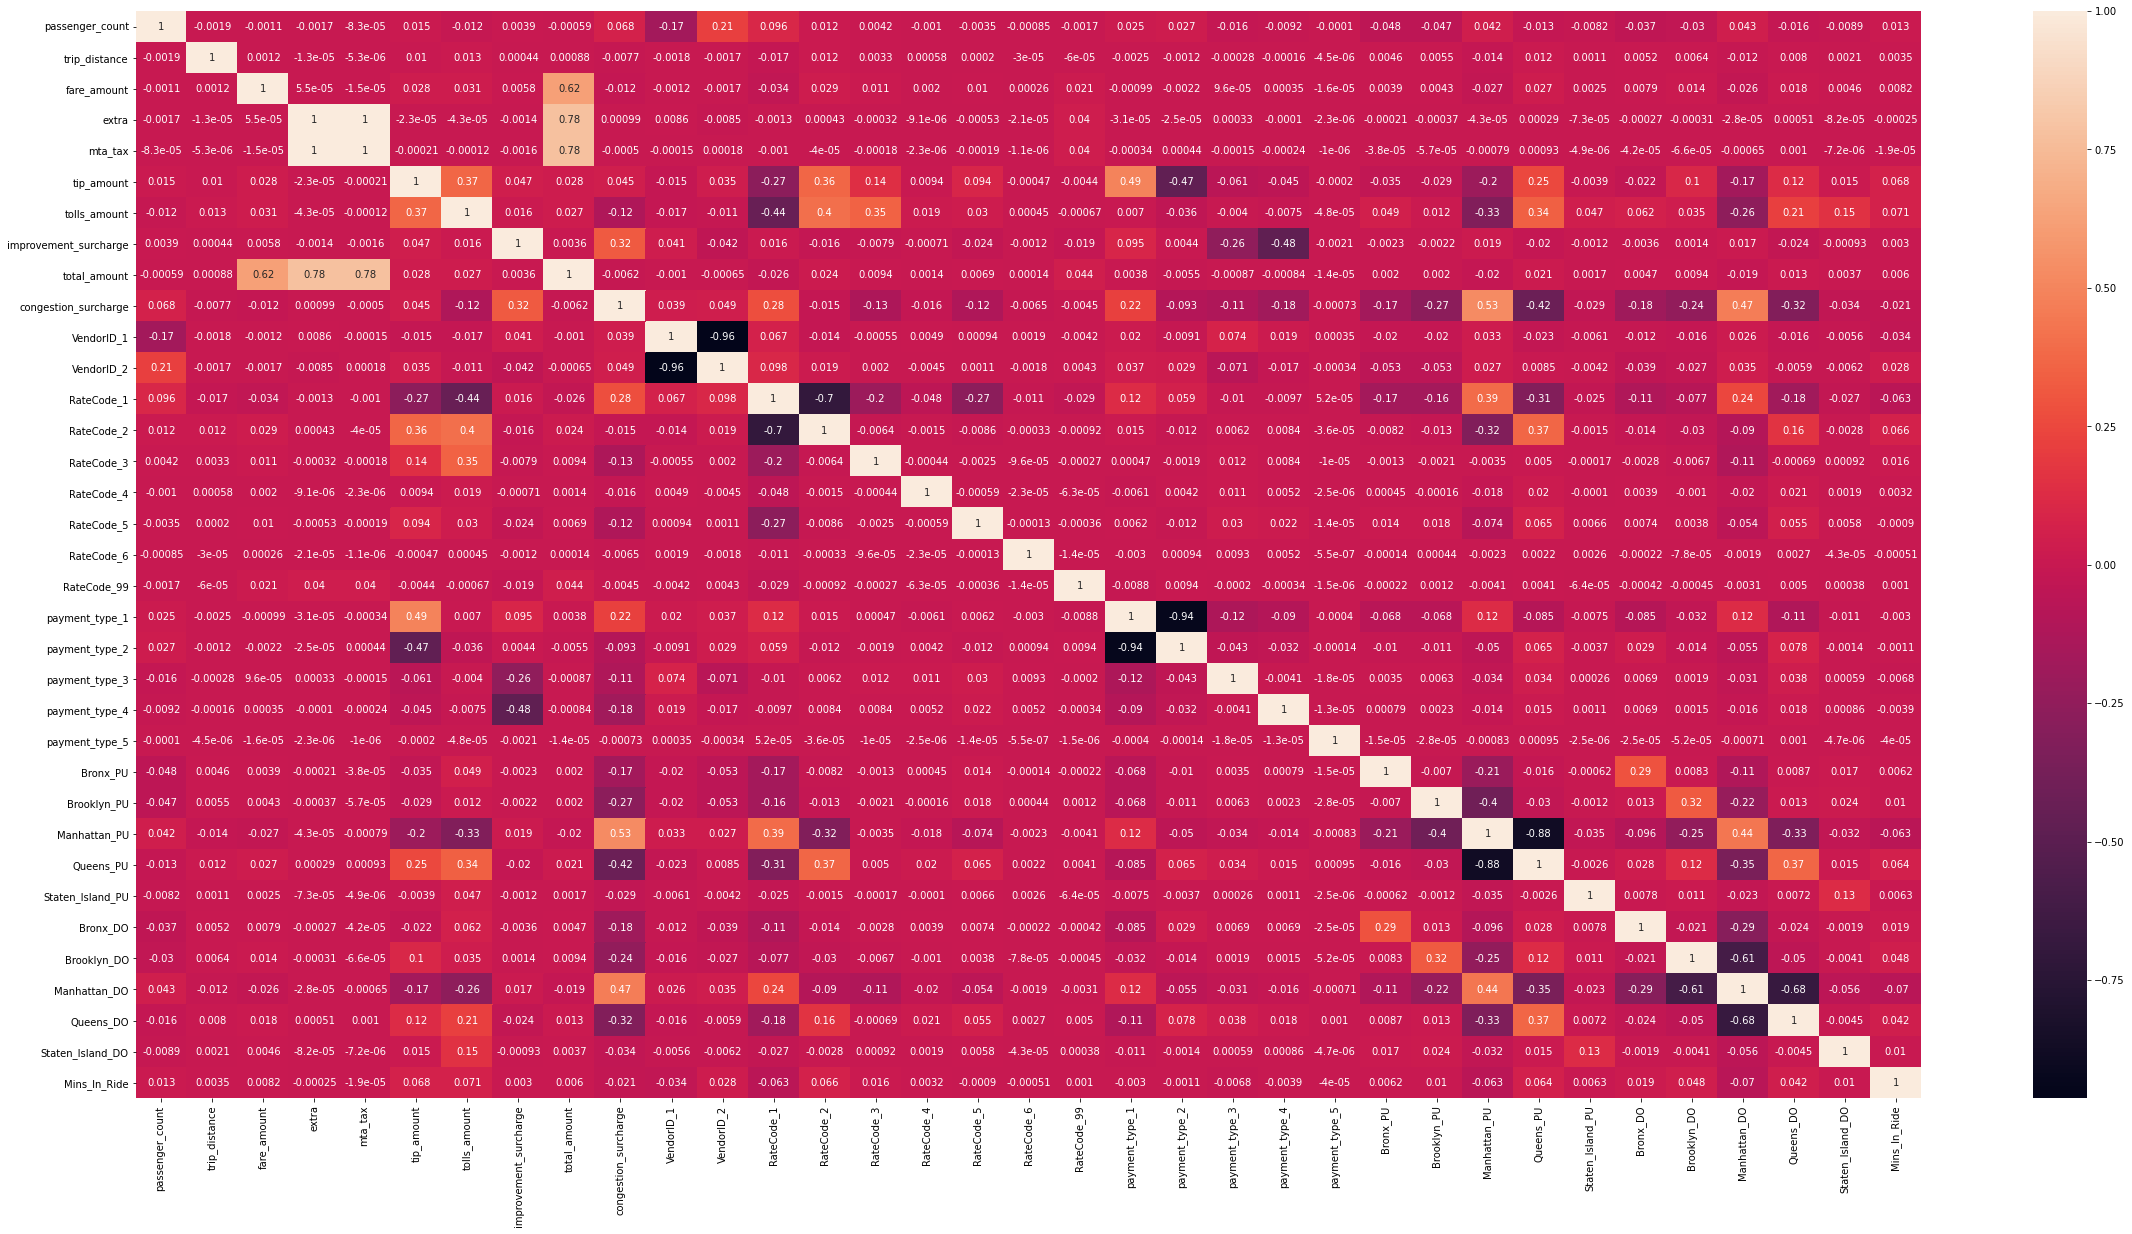

In [7]:
plt.figure(figsize = (40, 20))
sns.heatmap(temp.corr(), annot=True)
plt.yticks(rotation=0)
plt.show()

# 3. Feature Selection And Engineering<a id='3_Feature_Selection_And_Engineering'></a>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16673218 entries, 0 to 16673217
Data columns (total 52 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   passenger_count        float64
 3   trip_distance          float64
 4   store_and_fwd_flag     object 
 5   fare_amount            float64
 6   extra                  float64
 7   mta_tax                float64
 8   tip_amount             float64
 9   tolls_amount           float64
 10  improvement_surcharge  float64
 11  total_amount           float64
 12  congestion_surcharge   float64
 13  VendorID_1             int64  
 14  VendorID_2             int64  
 15  RateCode_1             int64  
 16  RateCode_2             int64  
 17  RateCode_3             int64  
 18  RateCode_4             int64  
 19  RateCode_5             int64  
 20  RateCode_6             int64  
 21  RateCode_99            int64  
 22  payment_type_1  

In [9]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,Queens_PU_isna,Bronx_PU_isna,Brooklyn_PU_isna,Staten_Island_PU_isna,Manhattan_DO_isna,Queens_DO_isna,Bronx_DO_isna,Brooklyn_DO_isna,Staten_Island_DO_isna,Mins_In_Ride
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,N,6.0,3.0,0.5,1.47,0.0,...,0,0,0,0,0,0,0,0,0,4.80
1,2020-01-01 00:24:22,2020-01-01 00:25:54,1.0,0.56,N,3.5,0.5,0.5,1.70,0.0,...,0,0,0,0,0,0,0,0,0,1.53
2,2020-01-01 00:46:46,2020-01-01 00:49:17,1.0,0.62,N,4.5,0.5,0.5,1.00,0.0,...,0,0,0,0,0,0,0,0,0,2.52
3,2020-01-01 00:17:53,2020-01-01 00:22:47,1.0,0.80,Y,5.5,3.0,0.5,1.85,0.0,...,0,0,0,0,0,0,0,0,0,4.90
4,2020-01-01 00:49:45,2020-01-01 00:54:12,1.0,0.86,N,5.5,0.5,0.5,1.86,0.0,...,0,0,0,0,0,0,0,0,0,4.45


In [11]:
dates = df['tpep_pickup_datetime'].str.split(' ')
dates = pd.Series(list(map(lambda x: x[0], dates)))

In [12]:
df['dayofweek'] = pd.to_datetime(dates).dt.dayofweek

In [13]:
pickup_date_vals = df['tpep_pickup_datetime']
test = np.array(pickup_date_vals.str.split('-| |:'))

In [20]:
# Split the year, month, day, hour, minute, and second from the pickup and dropoff times
pickup_date_vals = df['tpep_pickup_datetime']
test = np.array(pickup_date_vals.str.split('-| |:'))
year = list(map(lambda x: x[0], test))
month = list(map(lambda x: x[1], test))
day = list(map(lambda x: x[2], test))
hour = list(map(lambda x: x[3], test))
minute = list(map(lambda x: x[4], test))
second = list(map(lambda x: x[5], test))
df['PU_Year'] = year
df['PU_Month'] = month
df['PU_Day'] = day
df['PU_Hour'] = hour
df['PU_Minute'] = minute
df['PU_Second'] = second
df = df.drop('tpep_pickup_datetime', axis=1)
df.head()

,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,Brooklyn_DO_isna,Staten_Island_DO_isna,Mins_In_Ride,dayofweek,PU_Year,PU_Month,PU_Day,PU_Hour,PU_Minute,PU_Second
0,2020-01-01 00:33:03,1.0,1.20,N,6.0,3.0,0.5,1.47,0.0,0.3,...,0,0,4.80,2,2020,01,01,00,28,15
1,2020-01-01 00:25:54,1.0,0.56,N,3.5,0.5,0.5,1.70,0.0,0.3,...,0,0,1.53,2,2020,01,01,00,24,22
2,2020-01-01 00:49:17,1.0,0.62,N,4.5,0.5,0.5,1.00,0.0,0.3,...,0,0,2.52,2,2020,01,01,00,46,46
3,2020-01-01 00:22:47,1.0,0.80,Y,5.5,3.0,0.5,1.85,0.0,0.3,...,0,0,4.90,2,2020,01,01,00,17,53
4,2020-01-01 00:54:12,1.0,0.86,N,5.5,0.5,0.5,1.86,0.0,0.3,...,0,0,4.45,2,2020,01,01,00,49,45


In [21]:
dropoff_date_vals = df['tpep_dropoff_datetime']
test = np.array(dropoff_date_vals.str.split('-| |:'))
year = list(map(lambda x: x[0], test))
month = list(map(lambda x:x[1], test))
day = list(map(lambda x:x[2], test))
hour = list(map(lambda x:x[3], test))
minute = list(map(lambda x:x[4], test))
second = list(map(lambda x:x[5], test))
df['DO_Year'] = year
df['DO_Month'] = month
df['DO_Day'] = day
df['DO_Hour'] = hour
df['DO_Minute'] = minute
df['DO_Second'] = second
df = df.drop('tpep_dropoff_datetime', axis=1)
df.head()

,passenger_count,trip_distance,store_and_fwd_flag,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,PU_Day,PU_Hour,PU_Minute,PU_Second,DO_Year,DO_Month,DO_Day,DO_Hour,DO_Minute,DO_Second
0,1.0,1.20,N,6.0,3.0,0.5,1.47,0.0,0.3,11.27,...,01,00,28,15,2020,01,01,00,33,03
1,1.0,0.56,N,3.5,0.5,0.5,1.70,0.0,0.3,9.00,...,01,00,24,22,2020,01,01,00,25,54
2,1.0,0.62,N,4.5,0.5,0.5,1.00,0.0,0.3,9.30,...,01,00,46,46,2020,01,01,00,49,17
3,1.0,0.80,Y,5.5,3.0,0.5,1.85,0.0,0.3,11.15,...,01,00,17,53,2020,01,01,00,22,47
4,1.0,0.86,N,5.5,0.5,0.5,1.86,0.0,0.3,11.16,...,01,00,49,45,2020,01,01,00,54,12


In [31]:
# Create dummy variables out of the category column store_and_fwd_flag
dummy = pd.get_dummies(df[['store_and_fwd_flag', 'dayofweek']])
df = df.drop(['store_and_fwd_flag', 'dayofweek'], axis=1)
df = df.join(dummy)
df.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,...,DO_Year,DO_Month,DO_Day,DO_Hour,DO_Minute,DO_Second,dayofweek,store_and_fwd_flag_N,store_and_fwd_flag_NK,store_and_fwd_flag_Y
0,1.0,1.20,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,...,2020,01,01,00,33,03,2,1,0,0
1,1.0,0.56,3.5,0.5,0.5,1.70,0.0,0.3,9.00,2.5,...,2020,01,01,00,25,54,2,1,0,0
2,1.0,0.62,4.5,0.5,0.5,1.00,0.0,0.3,9.30,2.5,...,2020,01,01,00,49,17,2,1,0,0
3,1.0,0.80,5.5,3.0,0.5,1.85,0.0,0.3,11.15,2.5,...,2020,01,01,00,22,47,2,0,0,1
4,1.0,0.86,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,...,2020,01,01,00,54,12,2,1,0,0


In [ ]:
sorted_hours = df.sort_values(by='PU_Hour')

In [ ]:
sorted_hours = sorted_hours.groupby('PU_Hour').mean()

In [ ]:
sorted_hours.columns

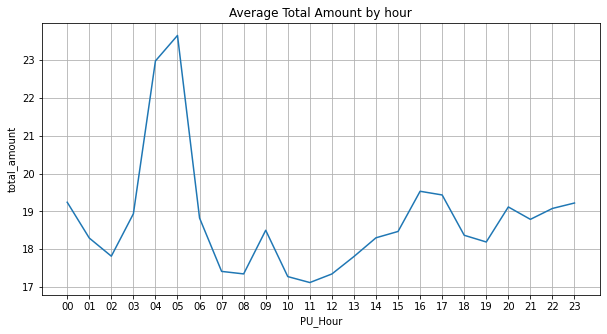

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x='PU_Hour', y='total_amount', data=sorted_hours)
plt.grid(True)
plt.title('Average Total Amount by hour')
plt.show()

In [21]:
frequency_trips = {}
for i in range(len(df)):
    if df['PU_Hour'][i] not in frequency_trips:
        frequency_trips[df['PU_Hour'][i]] = 1
        continue
    frequency_trips[df['PU_Hour'][i]] += 1
frequency_trips

{'00': 430959,
 '01': 302327,
 '02': 212567,
 '03': 158950,
 '04': 128217,
 '05': 150570,
 '06': 347717,
 '07': 636410,
 '08': 804735,
 '09': 801536,
 '10': 795099,
 '11': 829802,
 '12': 894640,
 '13': 913179,
 '14': 970072,
 '15': 992079,
 '16': 945945,
 '17': 1058812,
 '18': 1141009,
 '19': 1021522,
 '20': 890067,
 '21': 866080,
 '22': 784637,
 '23': 596287}

In [22]:
hours = []
values = []
for key in frequency_trips:
    hours.append(key)
    values.append(frequency_trips[key])

In [23]:
hours

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

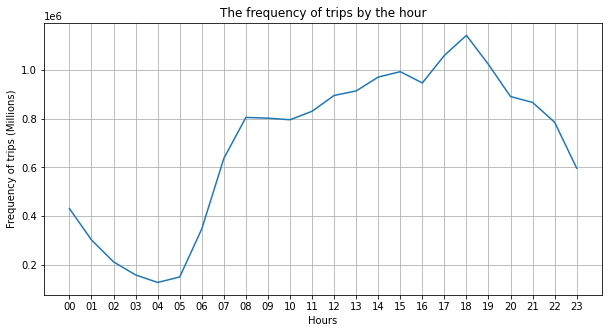

In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=hours, y=values)
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Frequency of trips (Millions)')
plt.title('The frequency of trips by the hour')
plt.show()

In [33]:
# Study the borough that gives the most tips
queens = df[['tip_amount', 'DO_Hour']].loc[df['Queens_DO'] == 1]
brooklyn = df[['tip_amount', 'DO_Hour']].loc[df['Brooklyn_DO'] == 1]
bronx = df[['tip_amount', 'DO_Hour']].loc[df['Bronx_DO'] == 1]
manhattan = df[['tip_amount', 'DO_Hour']].loc[df['Manhattan_DO'] == 1]
staten_island = df[['tip_amount', 'DO_Hour']].loc[df['Staten_Island_DO'] == 1]

In [34]:
queens = queens.sort_values('DO_Hour')
brooklyn = brooklyn.sort_values('DO_Hour')
bronx = bronx.sort_values('DO_Hour')
manhattan = manhattan.sort_values('DO_Hour')
staten_island = staten_island.sort_values('DO_Hour')

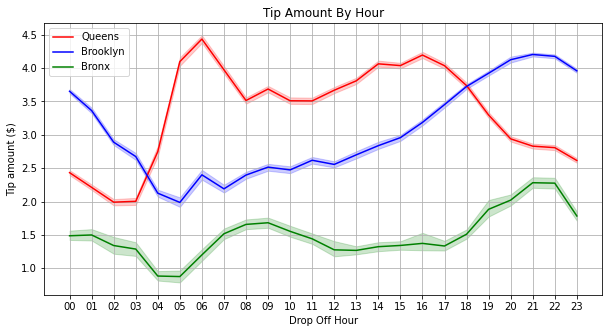

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='DO_Hour', y='tip_amount', data=queens, color='r')
sns.lineplot(x='DO_Hour', y='tip_amount', data=brooklyn, color='b')
sns.lineplot(x='DO_Hour', y='tip_amount', data=bronx, color='g')
plt.grid(True)
plt.xlabel('Drop Off Hour')
plt.ylabel('Tip amount ($)')
plt.title('Tip Amount By Hour')
plt.legend(['Queens', 'Brooklyn', 'Bronx'])
plt.show()

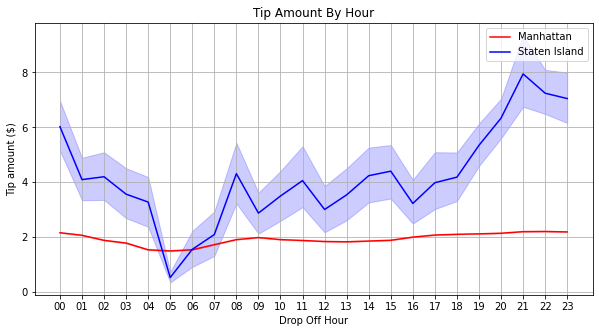

In [36]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='DO_Hour', y='tip_amount', data=manhattan, color='r')
sns.lineplot(x='DO_Hour', y='tip_amount', data=staten_island, color='b')
plt.grid(True)
plt.xlabel('Drop Off Hour')
plt.ylabel('Tip amount ($)')
plt.title('Tip Amount By Hour')
plt.legend(['Manhattan', 'Staten Island'])
plt.show()

In [37]:
df.to_csv('./datasets/Crucial_Elements.csv')